In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
sales_data = pd.read_csv('Sales Dataset.csv')

In [3]:
sales_data.head(50)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [5]:
# Convert 'Order Date' to datetime
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], format='%d/%m/%Y')

In [6]:
# Set 'Order Date' as the index
sales_data.set_index('Order Date', inplace=True)

In [7]:
# Resample data to monthly frequency and sum sales
monthly_sales = sales_data['Sales'].resample('M').sum()

In [8]:
# Display the first few resampled monthly sales data
monthly_sales.head(10)

Order Date
2015-01-31    28828.2540
2015-02-28    12588.4840
2015-03-31    54027.6920
2015-04-30    24710.0160
2015-05-31    29520.4900
2015-06-30    29181.3346
2015-07-31    35194.5580
2015-08-31    37349.2655
2015-09-30    65956.3998
2015-10-31    34561.9470
Freq: M, Name: Sales, dtype: float64

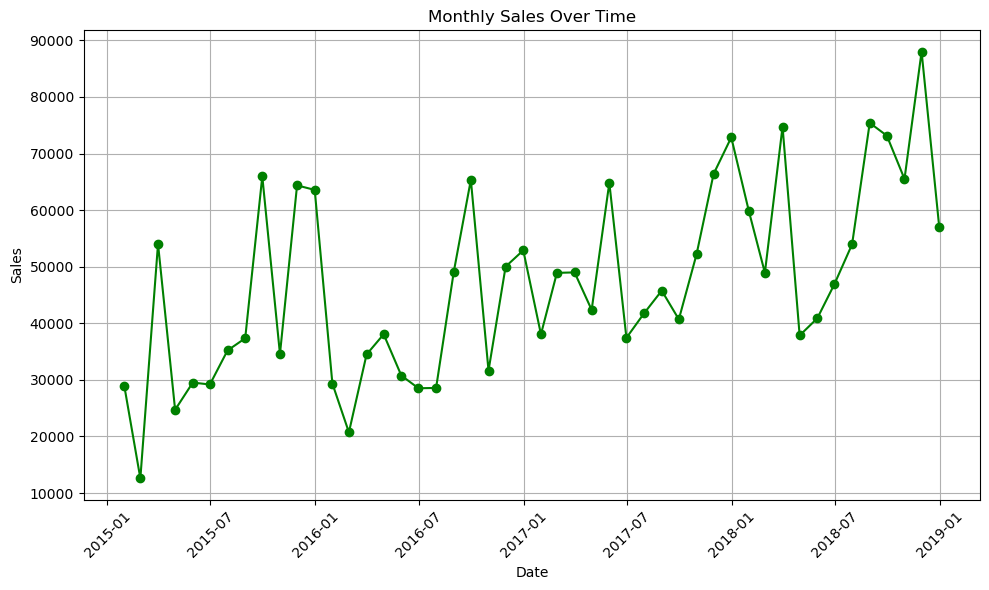

In [9]:
# Plotting the monthly sales data
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, marker='o', linestyle='-', color='green')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Fit ARIMA model
arima_model = ARIMA(monthly_sales, order=(1, 1, 1))
arima_result = arima_model.fit()

In [11]:
# Forecasting future values
forecast = arima_result.forecast(steps=12)

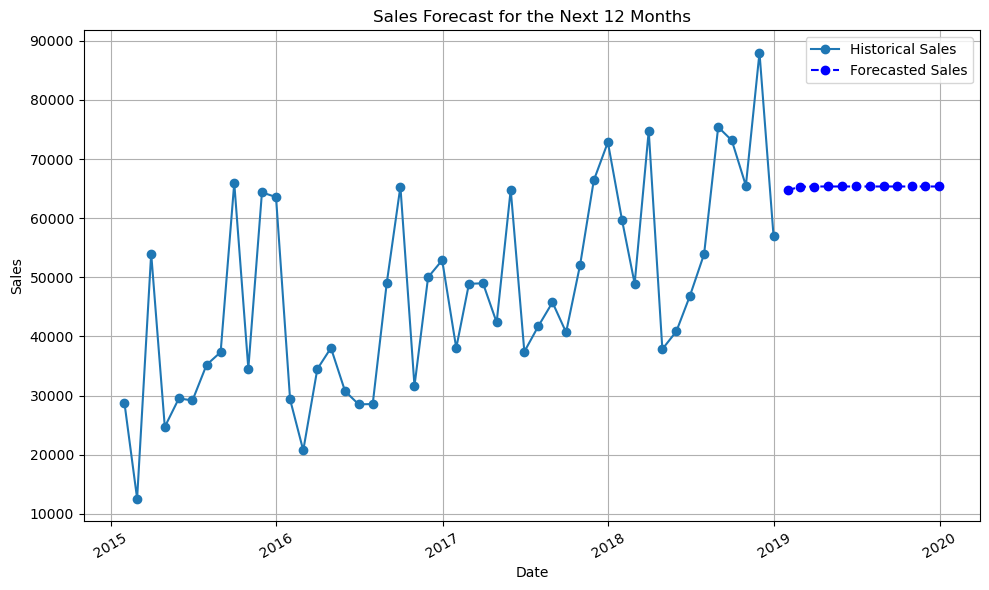

In [12]:
# Visualizing results
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, label='Historical Sales', marker='o')
plt.plot(forecast, label='Forecasted Sales', marker='o', linestyle='--', color='blue')
plt.title('Sales Forecast for the Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
forecast

2019-01-31    64741.396747
2019-02-28    65316.285737
2019-03-31    65358.754320
2019-04-30    65361.891587
2019-05-31    65362.123346
2019-06-30    65362.140466
2019-07-31    65362.141731
2019-08-31    65362.141825
2019-09-30    65362.141831
2019-10-31    65362.141832
2019-11-30    65362.141832
2019-12-31    65362.141832
Freq: M, Name: predicted_mean, dtype: float64

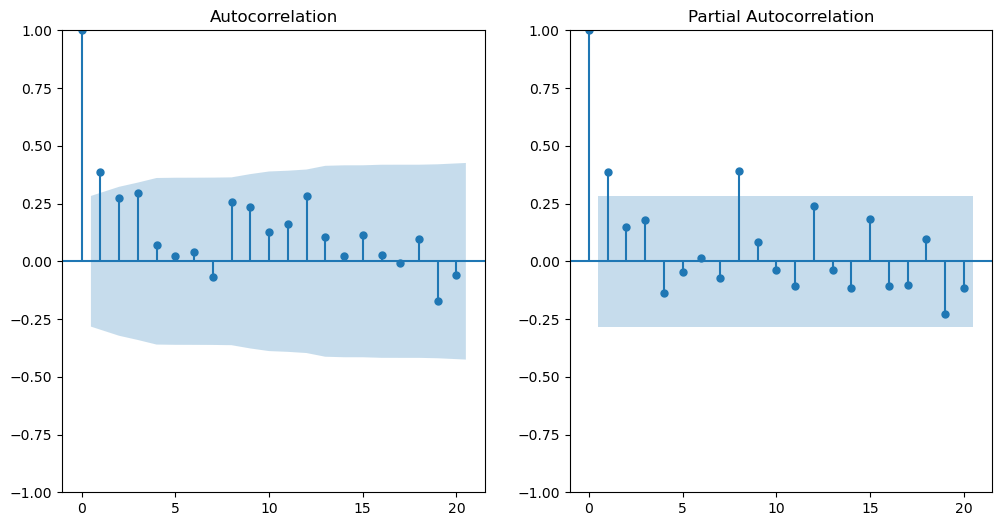

In [14]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(monthly_sales, lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(monthly_sales, lags=20, ax=plt.gca())
plt.show()

In [15]:
import itertools
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings during search

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d, q
pdq = list(itertools.product(p, d, q))

# Loop through the parameter combinations and fit ARIMA models
best_aic = float("inf")
best_order = None
for param in pdq:
    try:
        model = ARIMA(monthly_sales, order=param)
        result = model.fit()
        if result.aic < best_aic:
            best_aic = result.aic
            best_order = param
    except:
        continue

print(f'Best ARIMA order: {best_order} with AIC: {best_aic}')


Best ARIMA order: (0, 2, 2) with AIC: 1030.308983233589


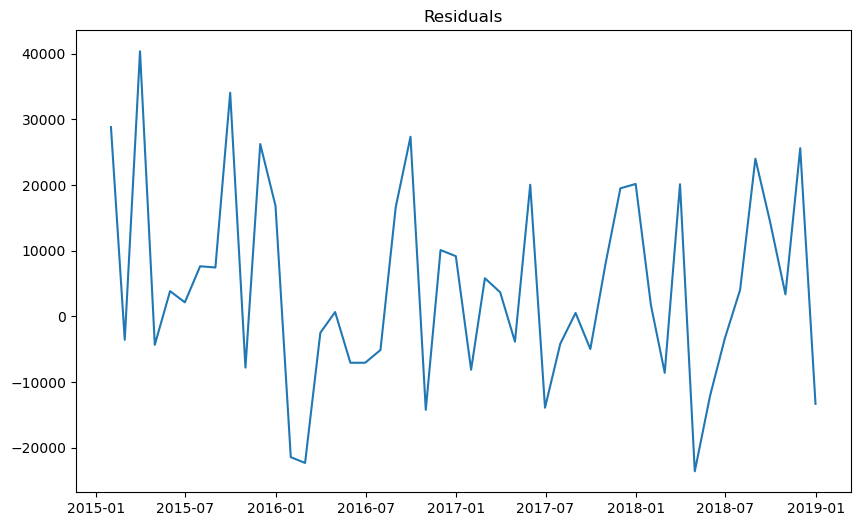

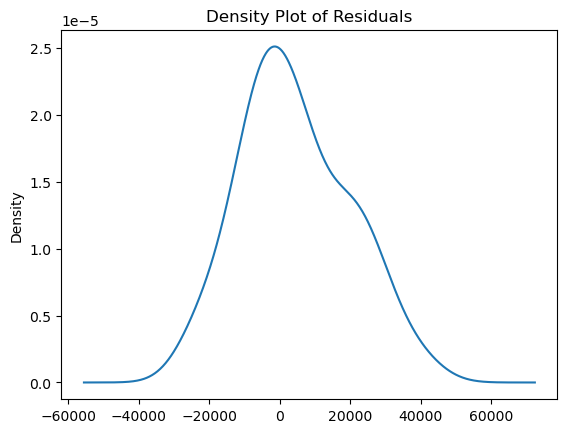

In [16]:
# Plot the residuals
residuals = arima_result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Plot the density of residuals
residuals.plot(kind='kde')
plt.title('Density Plot of Residuals')
plt.show()

In [17]:
# Forecast values
forecast_values = arima_result.predict(start=len(monthly_sales), end=len(monthly_sales) + 11)

# Calculate error metrics
mae = mean_absolute_error(monthly_sales[-12:], forecast_values)
rmse = np.sqrt(mean_squared_error(monthly_sales[-12:], forecast_values))

print(f'MAE: {mae}, RMSE: {rmse}')

MAE: 13468.994050580406, RMSE: 15687.240876193762


In [18]:
# Get ARIMA predictions
arima_predictions = arima_result.fittedvalues

In [19]:
# Calculate residuals (the part not explained by ARIMA)
residuals = monthly_sales - arima_predictions

In [20]:
# Scaling residuals
scaler = MinMaxScaler(feature_range=(-1, 1))
residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))

In [21]:
# Define input features (lags of residuals) and target (next residual value)
X = []
y = []
lags = 5  # Number of lags to consider
for i in range(lags, len(residuals_scaled)):
    X.append(residuals_scaled[i-lags:i, 0])
    y.append(residuals_scaled[i, 0])

X, y = np.array(X), np.array(y)

In [22]:
# Split data into training and test sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [23]:
# Define and train the neural network
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
nn_model.fit(X_train, y_train)

MLPRegressor(max_iter=1000)

In [24]:
# Predict residuals using the neural network
residuals_predicted = nn_model.predict(X_test)

In [25]:
# Inverse scale the residuals
residuals_predicted_inverse = scaler.inverse_transform(residuals_predicted.reshape(-1, 1))

In [26]:
# Combine ARIMA predictions and neural network residual predictions
final_predictions = arima_predictions[-len(residuals_predicted):] + residuals_predicted_inverse.flatten()

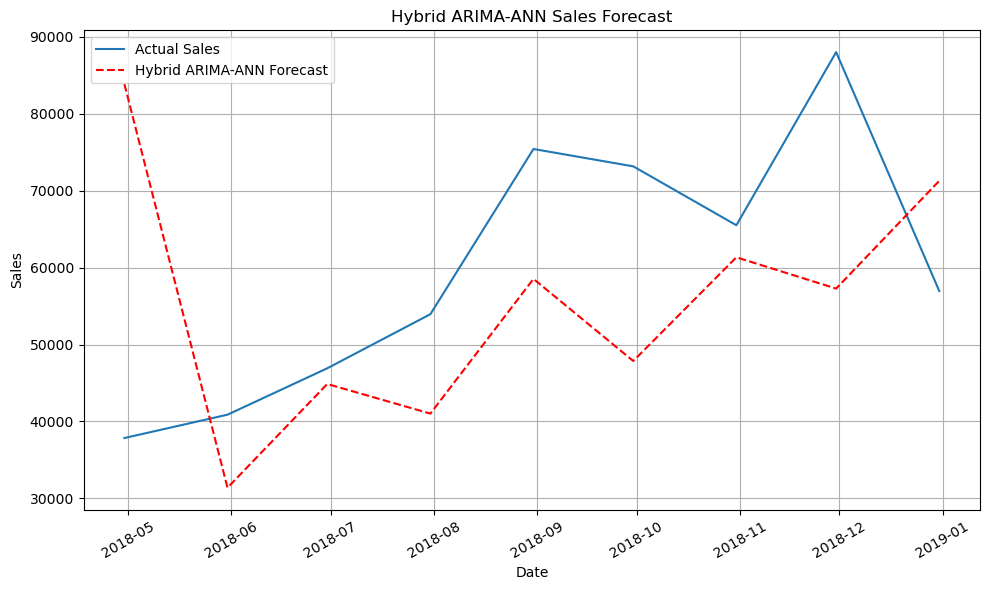

In [27]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales[-len(final_predictions):], label='Actual Sales')
plt.plot(final_predictions, label='Hybrid ARIMA-ANN Forecast', linestyle='--', color='r')
plt.title('Hybrid ARIMA-ANN Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [28]:
mse = mean_squared_error(monthly_sales[-len(final_predictions):], final_predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 496424108.9369119
